In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from __future__ import division, print_function, absolute_import
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [53]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import fetch_20newsgroups

In [25]:
class autoencoder:
    def __init__(self, input_dim, hidden_dim, epoch, batch_size, learning_rate=0.001):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        x = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
        
        with tf.name_scope('encode'):
            weights = tf.Variable(tf.random_normal([input_dim, hidden_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([hidden_dim]), name='biases')
            encoded = tf.nn.sigmoid(tf.matmul(x, weights) + biases)
            
        with tf.name_scope('decode'):
            weights = tf.Variable(tf.random_normal([hidden_dim, input_dim], dtype=tf.float32), name='weights')
            biases = tf.Variable(tf.zeros([input_dim]), name='biases')
            decoded = tf.nn.sigmoid(tf.matmul(encoded, weights) + biases)
            
        self.x = x
        self.encoded = encoded
        self.decoded = decoded
        self.loss = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(self.x, self.decoded))))
        
        self.train_op = tf.train.AdamOptimizer(self.learning_rate).minimize(self.loss)
        self.saver = tf.train.Saver()

    def get_batch(self, X, size):
        a = np.random.choice(len(X), size, replace=False)
        return X[a]

    def train(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.epoch):
                for j in range(np.shape(data)[0] // self.batch_size):
                    batch_data = self.get_batch(data, self.batch_size)
                    l, _ = sess.run([self.loss, self.train_op], feed_dict={self.x:batch_data})
                print('epoch {0}: loss = {1}'.format(i+1, l))
                self.saver.save(sess, './autoencoder.ckpt')
            self.saver.save(sess, './autoencoder.ckpt')
            
    def test(self, data):
        with tf.Session() as sess:
            self.saver.restore(sess, "./autoencoder.ckpt")
            hidden, reconstructed = sess.run([self.encoded, self.decoded], feed_dict={self.x:data})
            return hidden, reconstructed
        
    def output(self, data):
        hidden, reconstructed = self.test(data)
        f, a = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(data.shape[0]):
            a[0][i].imshow(np.reshape(data[i], (28, 28)))
            a[1][i].imshow(np.reshape(reconstructed[i], (28, 28)))
        f.show()
        plt.draw()
        plt.show()
        
def randomizer(r, data, n):
    randomize = np.arange(len(data))
    np.random.shuffle(randomize)
    original_data = data[randomize]
    recon_data= r[randomize]
    original_sample=original_data[:n]
    recon_sample=recon_data[:n]
    return (recon_sample,original_sample)

Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
(55000, 784)
784
epoch 1: loss = 0.35843634605407715
epoch 2: loss = 0.3304761052131653
epoch 3: loss = 0.3096383213996887
epoch 4: loss = 0.30214035511016846
epoch 5: loss = 0.3044756352901459
epoch 6: loss = 0.2956421971321106
epoch 7: loss = 0.2894335389137268
epoch 8: loss = 0.2840223014354706
epoch 9: loss = 0.28180497884750366
epoch 10: loss = 0.2892477214336395
Rebuilding the images from output layer
INFO:tensorflow:Restoring parameters from ./Autoencoder.ckpt


/opt/anaconda/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


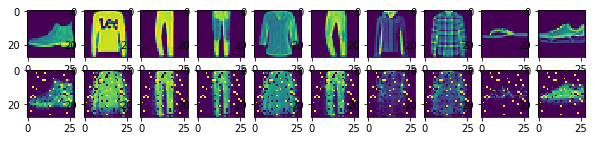

[9 2 1 1 6 1 4 6 5 7]
INFO:tensorflow:Restoring parameters from ./Autoencoder.ckpt
INFO:tensorflow:Restoring parameters from ./Autoencoder.ckpt
Logistic Regression
The training accuracy is  0.7164727272727273
The testing accuracy is  0.6335
Examining the pairwise distances
The pairwises distance for original dataset are [[0.         0.3061043  0.52474475 ... 0.18777078 0.8362476  0.56487924]
 [0.3061043  0.         0.35030138 ... 0.17197013 0.5657319  0.38030672]
 [0.52474475 0.35030138 0.         ... 0.32729423 0.6609673  0.4416269 ]
 ...
 [0.18777078 0.17197013 0.32729423 ... 0.         0.59523475 0.4014383 ]
 [0.8362476  0.5657319  0.6609673  ... 0.59523475 0.         0.42028558]
 [0.56487924 0.38030672 0.4416269  ... 0.4014383  0.42028558 0.        ]]
The pairwises distance for original dataset are [[0.         0.12244916 0.22607458 ... 0.06509161 0.44837117 0.34294355]
 [0.12244916 0.         0.15471184 ... 0.03252584 0.3339606  0.24272859]
 [0.22607458 0.15471184 0.         ... 0

In [21]:
mnist = input_data.read_data_sets('data/fashion',source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', one_hot=False)
       
hidden_dim = 200
data = mnist.train.images
print(data.shape)
input_dim = len(data[0])
print(input_dim)
auto_en = autoencoder(input_dim = input_dim, hidden_dim = hidden_dim, epoch = 10, batch_size = 100)

auto_en.train(data)
mnist.test.images[:10].shape
print("Rebuilding the images from output layer")
rec = auto_en.show_result(mnist.test.images[:10])
print(mnist.test.labels[:10])

test_data = mnist.test.images

hidden, new = auto_en.test(data)
hidden2, new2 = auto_en.test(test_data)

print("Logistic Regression for Fashion MNIST")

logReg = LogisticRegression(penalty='l2', solver = 'lbfgs', multi_class='multinomial')
logReg.fit(new, mnist.train.labels)
pred = logReg.predict(mnist.test.images)

score = logReg.score(new, mnist.train.labels)
print("The training accuracy is ",score)

score = logReg.score(mnist.test.images, mnist.test.labels)
print("The testing accuracy is ",score)

print("Pairwise distances")
data = mnist.train.images
reconstructed, original = randomizer(new, data, 100)

In [76]:
pairwise_old = pairwise_distances(original, metric="cosine")
pairwise_new =  pairwise_distances(reconstructed, metric="cosine")
print("pairwise distance for original dataset are", pairwise_old)
print("pairwise distance for original dataset are", pairwise_new)

pairwise distance for original dataset are [[0.         0.3061043  0.52474475 ... 0.18777078 0.8362476  0.56487924]
 [0.3061043  0.         0.35030138 ... 0.17197013 0.5657319  0.38030672]
 [0.52474475 0.35030138 0.         ... 0.32729423 0.6609673  0.4416269 ]
 ...
 [0.18777078 0.17197013 0.32729423 ... 0.         0.59523475 0.4014383 ]
 [0.8362476  0.5657319  0.6609673  ... 0.59523475 0.         0.42028558]
 [0.56487924 0.38030672 0.4416269  ... 0.4014383  0.42028558 0.        ]]
pairwise distance for original dataset are [[0.         0.12244916 0.22607458 ... 0.06509161 0.44837117 0.34294355]
 [0.12244916 0.         0.15471184 ... 0.03252584 0.3339606  0.24272859]
 [0.22607458 0.15471184 0.         ... 0.15495539 0.32678956 0.22729087]
 ...
 [0.06509161 0.03252584 0.15495539 ... 0.         0.3910787  0.26710236]
 [0.44837117 0.3339606  0.32678956 ... 0.3910787  0.         0.18501258]
 [0.34294355 0.24272859 0.22729087 ... 0.26710236 0.18501258 0.        ]]
